In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import netCDF4 as nc4

# https://mpl-point-clicker.readthedocs.io/en/latest/
from mpl_point_clicker import clicker
from mpl_interactions import zoom_factory, panhandler

In [5]:
pmm = "../eORCA1.4.2_ModifStraits_mesh_mask.nc"
#pmm = "../eORCA1.4.2_ModifStraits_domain_cfg.nc"

mm = nc4.Dataset(pmm)
botl = mm.variables['mbathy'][0] # goes from 0 to 74 (75 levels)
#nJ,nI = np.shape(botl) # j=0 Antartique, nJ-1 Arctique

<IPython.core.display.Javascript object>


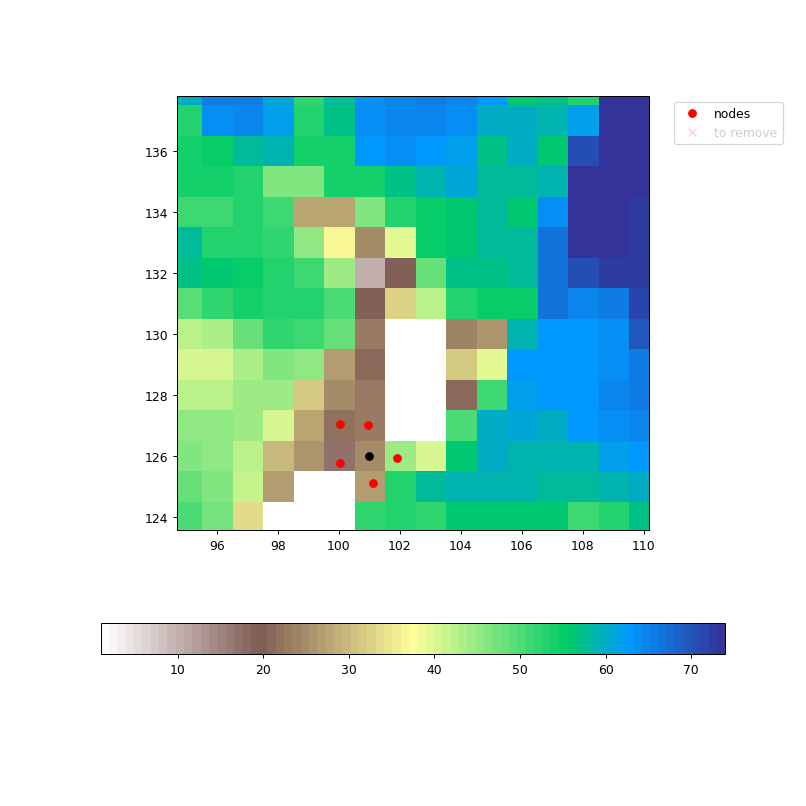

In [56]:
# twilight, gnuplot, gist_heat, hsv
palette = plt.get_cmap("terrain_r",75)
%matplotlib notebook
fig, ax = plt.subplots(figsize=(9,9))
cf = plt.imshow(botl, cmap=palette)
ax.invert_yaxis()
fig.colorbar(cf,orientation="horizontal")
ax.set_aspect(aspect='equal')

try : 
    with open('protected_cells.npy', 'rb') as f:
        protected_nodes = np.load(f)
    plt.scatter(protected_nodes[:,0],protected_nodes[:,1],color="k")
except :
    print("list not found")

# add zooming and middle click to pan
zoom_factory(ax)
ph = panhandler(fig, button=2)

klicker = clicker(ax, ["nodes","to remove"], markers=["o","x"], colors=["red","red"])
ax.patch.set_color('0.7')


plt.show()

In [57]:
coor = klicker.get_positions()['nodes']
print("New set of coordinates")
print(coor)

toremove = klicker.get_positions()['to remove']
print("Set to remove from the list")
print(toremove)

New set of coordinates
[[100.96615801 127.02143059]
 [100.02602763 127.05080967]
 [100.02602763 125.78750947]
 [101.11305338 125.11179076]
 [101.90628839 125.93440484]]
Set to remove from the list
[]


---
## Add and save

In [58]:
# T cells are centered in +/- .49999999
nodes = np.int64(np.rint(coor))
#print(nodes)
if len(nodes)>0 :
    with open('protected_cells.npy', 'rb') as f:
        protected_nodes = np.load(f)

    tmp = np.vstack((protected_nodes,nodes))
else : 
    print("new set empty")

In [59]:
with open('protected_cells.npy', 'wb') as f:
    np.save(f, np.int64(tmp))
print("saved")

saved


---
## Remove duplicates in protected list

In [60]:
with open('protected_cells.npy', 'rb') as f:
    protected_nodes = np.load(f)

tmp = np.array([protected_nodes[0]])
for a in protected_nodes[1:]:
    flag = True
    for b in tmp:
        #print(a,b)
        if np.allclose(a,b):
            #print("x is a duplicate")
            print("%s is a duplicate" % a)
            flag = False
            break
    #print("--------")
    if flag : tmp = np.vstack((tmp,a))
print("no more duplicate")

no more duplicate


In [68]:
with open('protected_cells.npy', 'wb') as f:
    np.save(f, np.int64(tmp))
print("saved")

saved


---
## Remove from protected list

In [111]:
toremove = np.int64(np.rint(toremove))

if len(nodes)<=0 :
    print("remove list empty")
else : 
    with open('protected_cells.npy', 'rb') as f:
        protected_nodes = np.load(f)

    Ni,_ = np.shape(protected_nodes)
    print("lenght list %d" % (Ni))
    for b in toremove:
        #print(protected_nodes)
        flag = True
        for i in range(Ni):
            a = protected_nodes[i]
            if np.allclose(a,b):
                #print("xxxxx")
                protected_nodes = np.delete(protected_nodes,i,0) # delete row
                print("i=%3d %s is removed" % (i,a))
                Ni-=1 ; flag = False
                break
        if flag : print("%s not found in the list" % (b))
    print("done")

lenght list 1976
i=1582 [360 147] is removed
done


In [112]:
with open('protected_cells.npy', 'wb') as f:
    np.save(f, np.int64(protected_nodes))
print("saved")

saved


---
## Plot

In [113]:
# https://mpl-point-clicker.readthedocs.io/en/latest/
palette = plt.get_cmap("terrain_r",75)

%matplotlib inline

fig, ax = plt.subplots(figsize=(25,25))
cf = plt.imshow(botl[::-1], cmap=palette)
cbar = fig.colorbar(cf,orientation="horizontal")
cbar.set_label('bottom level')
ax.set_aspect(aspect='equal')
ax.set_xlabel("i index")
ax.set_ylabel("j index")
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.xaxis.set_major_locator(MultipleLocator(25))
ax.yaxis.set_major_locator(MultipleLocator(25))
ax.tick_params(left=True,right=True,top=True,bottom=True, width = 3, labelsize = 20)
ax.tick_params(which='minor',length=6)
ax.tick_params(which="major",length=8)    

try : 
    with open('protected_cells.npy', 'rb') as f:
        protected_nodes = np.load(f)
    plt.scatter(protected_nodes[:,0],protected_nodes[:,1],color="k",s=1)
except :
    print("no list found")

ax.patch.set_color('0.7')
plt.savefig("protected_bathy.png",dpi=600)
print("figure saved")
plt.close()

figure saved


---
## Visualise

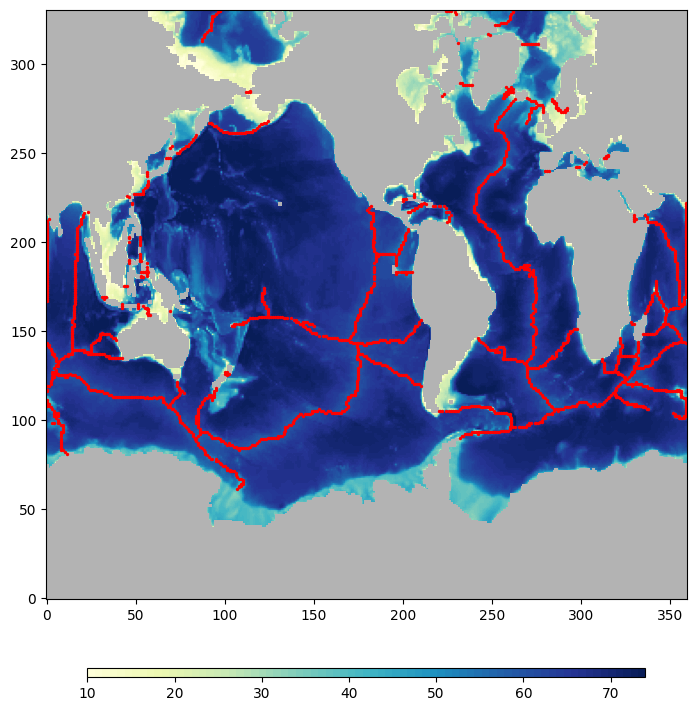

In [8]:
# https://mpl-point-clicker.readthedocs.io/en/latest/
palette = plt.get_cmap("YlGnBu",75)
%matplotlib inline
botl =np.ma.masked_where(botl==1,botl)
fig, ax = plt.subplots(figsize=(9,9))
cf = plt.imshow(botl, cmap=palette) # [::-1] invert y index, [::-1,::-1] invert y and x index
fig.colorbar(cf,orientation="horizontal",shrink=0.8, location='bottom',aspect = 60, fraction=0.05,pad = 0.1)
ax.set_aspect(aspect='equal')

try : 
    with open('protected_cells.npy', 'rb') as f:
        protected_nodes = np.load(f)
except :
    protected_nodes = []
    print("list not found")

plt.scatter(protected_nodes[:,0],
            protected_nodes[:,1],color="r", s=2)
    

# add zooming and middle click to pan
ax.invert_yaxis()
ax.patch.set_color('0.7')


plt.show()